In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img
from keras.applications.vgg19 import VGG19, preprocess_input,decode_predictions

In [2]:
len(os.listdir('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'))

38

In [3]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3,horizontal_flip = True,preprocessing_function= preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

In [4]:
train_data = train_datagen.flow_from_directory(directory = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',target_size = (256,256), batch_size = 32)
val_data = val_datagen.flow_from_directory(directory = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',target_size = (256,256), batch_size = 32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [5]:
#fucntion call

def plot_image(img_arr,label):
    for img,lbl in zip(img_arr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.show()

In [6]:
img,label = next(train_data)

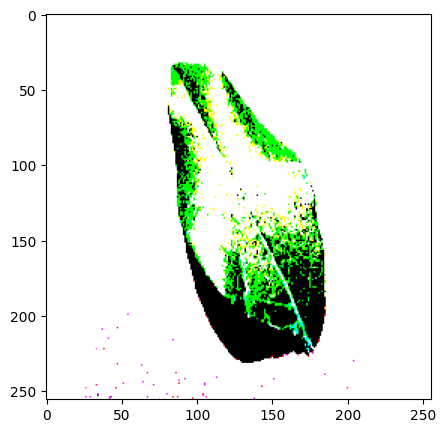

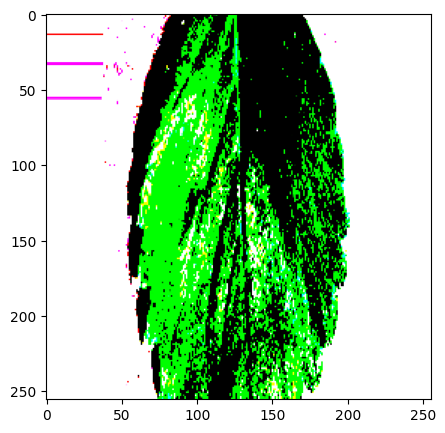

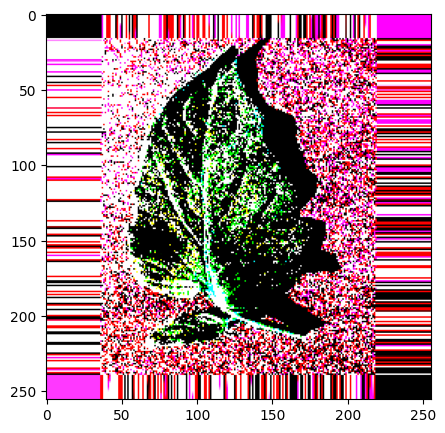

In [7]:
plot_image(img[:3],label[:3])

In [8]:
import keras
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19

In [9]:
base_model = VGG19(input_shape=(256,256,3),include_top = False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
for layer in base_model.layers:
    layer.trainable = False

In [11]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [12]:
X = Flatten()(base_model.output)

In [13]:
X = Dense(units = 38, activation = 'softmax')(X)

In [14]:
model = Model(base_model.input,X)

In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │     1,245,222 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,269,606 (81.14 MB)

 Trainable params: 1,245,222 (4.75 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
#early_stopping
es = EarlyStopping(monitor='val_accuracy', min_delta = 0.0001,patience = 3, verbose=1)

In [19]:
mp = ModelCheckpoint(filepath = "best_model.keras",monitor='val_accuracy', verbose=1,save_best_only = True)

In [20]:
cp = [es,mp]

In [21]:
history = model.fit(
    train_data,
    steps_per_epoch = 16,
    epochs= 50,
    verbose = 1,
    callbacks = cp,
    validation_data = val_data,
    validation_steps = 16
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730907270.931549      94 service.cc:145] XLA service 0x79fb40005490 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730907270.931607      94 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730907270.931611      94 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/16 ━━━━━━━━━━━━━━━━━━━━ 5:46 23s/step - accuracy: 0.0000e+00 - loss: 14.7987

I0000 00:00:1730907287.808282      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.1006 - loss: 26.3322
Epoch 1: val_accuracy improved from -inf to 0.41992, saving model to best_model.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 915ms/step - accuracy: 0.1059 - loss: 26.1922 - val_accuracy: 0.4199 - val_loss: 14.2410
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.4233 - loss: 16.8889
Epoch 2: val_accuracy improved from 0.41992 to 0.58984, saving model to best_model.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 806ms/step - accuracy: 0.4249 - loss: 16.7847 - val_accuracy: 0.5898 - val_loss: 9.3364
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.4908 - loss: 13.8436
Epoch 3: val_accuracy improved from 0.58984 to 0.62305, saving model to best_model.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 693ms/step - accuracy: 0.4920 - loss: 13.8378 - val_accuracy: 0.6230 - val_loss: 8.9066
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.5948 - loss: 10.0236
Epoch 4: val_accuracy improved from 0.623

In [22]:
h =  history.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

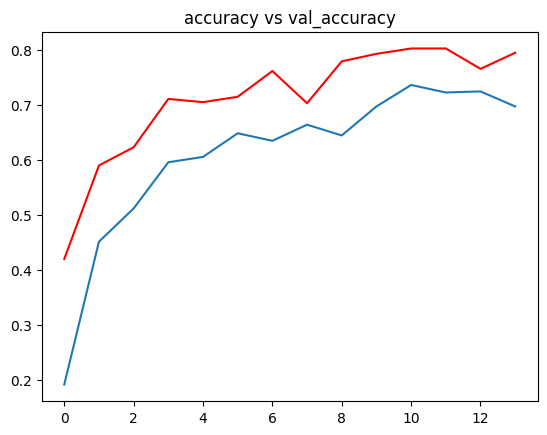

In [23]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c = 'red')
plt.title('accuracy vs val_accuracy')
plt.show()

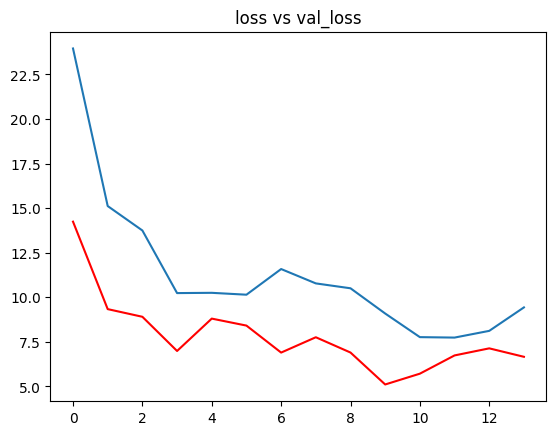

In [24]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c = 'red')
plt.title('loss vs val_loss')
plt.show()

In [25]:
from keras.models import load_model
best_model = load_model('/kaggle/working/best_model.keras')

In [26]:
acc = best_model.evaluate(val_data)[1]

550/550 ━━━━━━━━━━━━━━━━━━━━ 109s 196ms/step - accuracy: 0.7888 - loss: 6.8281


In [27]:
print(f'Validation accuracy: {acc*100}%')

Validation accuracy: 79.0177583694458%


In [28]:
references = dict(zip(train_data.class_indices.values(),train_data.class_indices.keys()))
references

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [29]:
def predict_output(path):
    img = np.expand_dims(preprocess_input(img_to_array(load_img(path,target_size=(256,256)))),axis=0)
    #print(img.shape)
    pred =  np.argmax(model.predict(img))
    print(references[pred])

In [30]:
path = predict_output('/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight4.JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Potato___Early_blight
